# Eclat

## Importing libraries

In [6]:
!pip install apyori


[notice] A new release of pip is available: 23.2 -> 24.1.2
[notice] To update, run: C:\Users\RAHUL KANNAN.P\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing dataset

In [8]:
dataset = pd.read_csv('Movie Recommandation.csv', header = None)
transactions = []
for i in range(0, 7466):
  transactions.append([str(dataset.values[i,j]) for j in range(0, 20)])

## Eclat Training on Dataset

In [10]:
pip install apyori

  Using cached apyori-1.1.2-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [11]:
from apyori import apriori
rules = apriori(transactions = transactions, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2, max_length = 2)

## Visualizing

### Raw Results

In [12]:
results = list(rules)

In [ ]:
results

[RelationRecord(items=frozenset({'Captain America', 'Black Panther'}), support=0.00334851326011251, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Captain America'}), items_add=frozenset({'Black Panther'}), confidence=0.24509803921568626, lift=5.140174047146949)]),
 RelationRecord(items=frozenset({'Game of thrones', 'Comedy nights with Kapil'}), support=0.0032145727297080095, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Game of thrones'}), items_add=frozenset({'Comedy nights with Kapil'}), confidence=0.20512820512820512, lift=3.1001764766946955)]),
 RelationRecord(items=frozenset({'Kanan Gill Comedy', 'Comedy nights with Kapil'}), support=0.008036431824270024, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Kanan Gill Comedy'}), items_add=frozenset({'Comedy nights with Kapil'}), confidence=0.2714932126696833, lift=4.103174748566509)]),
 RelationRecord(items=frozenset({'Prision Break', 'Game of thrones'}), support=0.004553978033753014, ordered_sta

### Proper Display

In [13]:
def inspect(results):
    movie_1         = [tuple(result[2][0][0])[0] for result in results]
    movie_2         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    return list(zip(movie_1, movie_2, supports))
resultsinDataFrame = pd.DataFrame(inspect(results), columns = ['Movie 1', 'Movie 2', 'Support'])

In [14]:
resultsinDataFrame

,Movie 1,Movie 2,Support
0,Captain America,Black Panther,0.003349
1,Game of thrones,Comedy nights with Kapil,0.003215
2,Kanan Gill Comedy,Comedy nights with Kapil,0.008036
3,Game of thrones,Prision Break,0.004554
4,Harry Potter 1,Harry Potter 2,0.005759
5,Harry Potter 1,The Lord of the rings,0.005090
6,crimes of grindelwald,Harry Potter 2,0.005759
7,Interstellar,inception,0.015939
8,The Wolf of Wall Street,inception,0.005358


In [15]:
resultsinDataFrame.nlargest(n = 10, columns = 'Support')

,Movie 1,Movie 2,Support
7,Interstellar,inception,0.015939
2,Kanan Gill Comedy,Comedy nights with Kapil,0.008036
4,Harry Potter 1,Harry Potter 2,0.005759
6,crimes of grindelwald,Harry Potter 2,0.005759
8,The Wolf of Wall Street,inception,0.005358
5,Harry Potter 1,The Lord of the rings,0.005090
3,Game of thrones,Prision Break,0.004554
0,Captain America,Black Panther,0.003349
1,Game of thrones,Comedy nights with Kapil,0.003215


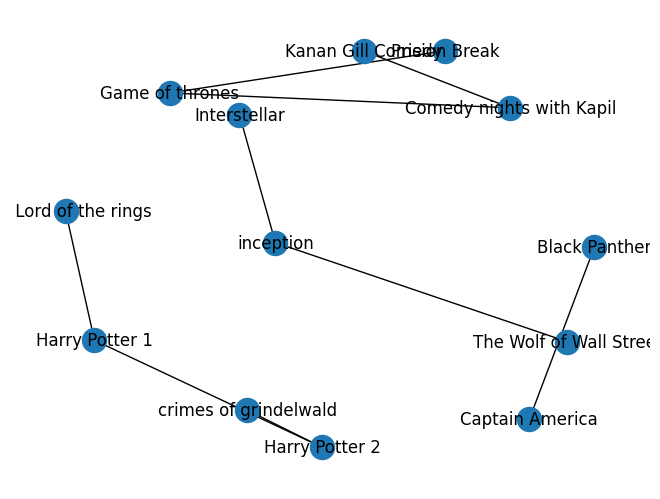

In [16]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a network graph
G = nx.Graph()
for index, row in resultsinDataFrame.iterrows():
    G.add_edge(row['Movie 1'], row['Movie 2'], weight=row['Support'])

nx.draw(G, with_labels=True)
plt.show()

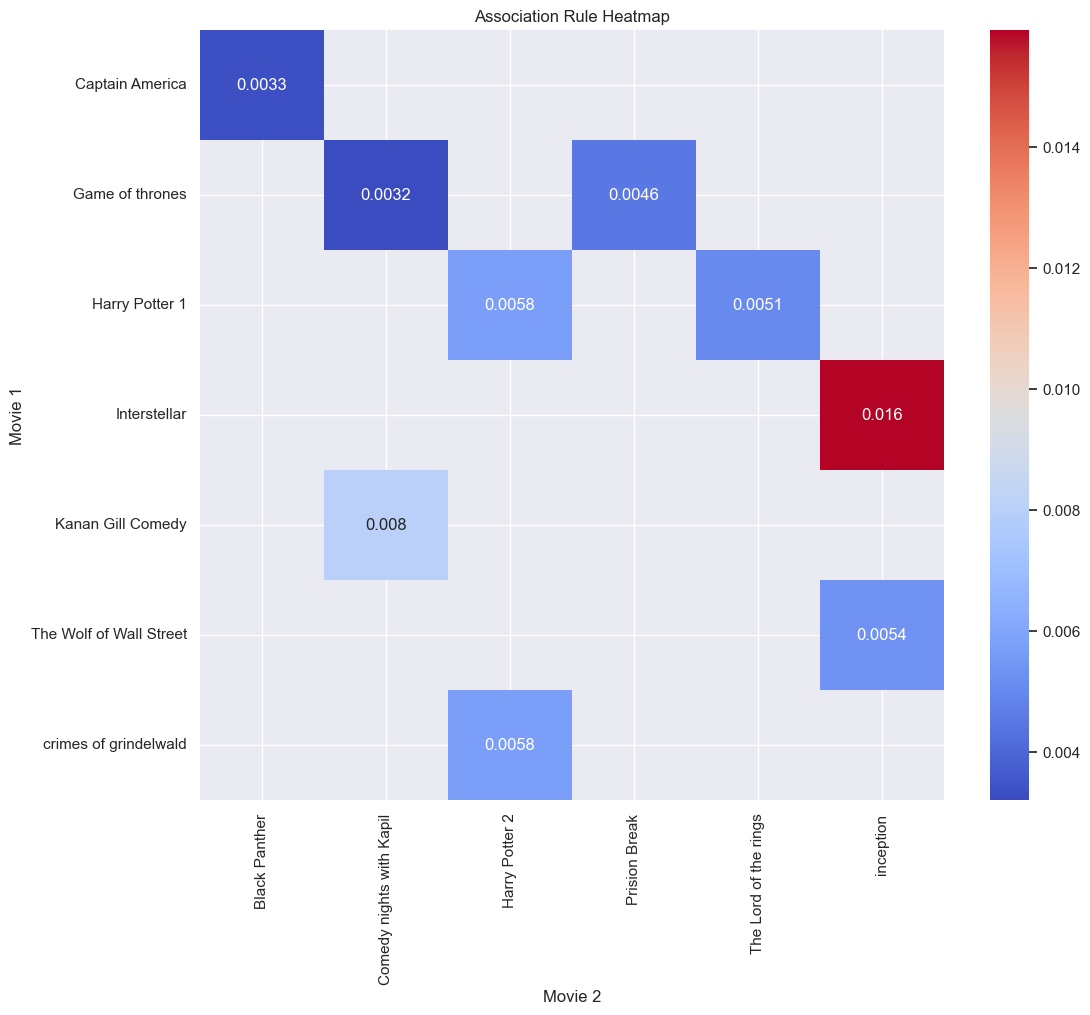

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
plt.figure(figsize=(12, 10))
sns.heatmap(resultsinDataFrame.pivot_table(index='Movie 1', columns='Movie 2', values='Support'), annot=True, cmap='coolwarm')
plt.xlabel('Movie 2')
plt.ylabel('Movie 1')
plt.title('Association Rule Heatmap')
plt.show()